In [1]:
import numpy as np
import pandas as pd
from PIL import Image
width = 512
height = 512

In [2]:
def loadandresize(maxwidth, maxheight, filename):
    f = Image.open(filename)
    fsize = f.size
    ratio = min(maxwidth/fsize[0], maxheight/fsize[1])
    resultsize = (int(fsize[0]*ratio), int(fsize[1]*ratio))
    return f.resize(resultsize)

In [3]:
filename = "2016.05.OctDec.pdf-12.jpg"
#base = loadandresize(width, height, filename)
#base
base = Image.open(filename)

In [4]:
base.info

{'jfif': 257,
 'jfif_density': (300, 300),
 'jfif_unit': 0,
 'jfif_version': (1, 1)}

In [5]:
width, height = base.size
base.size

(1650, 2550)

In [6]:
data = base.getdata()
len(data)

4207500

In [7]:
data

In [8]:
x = np.array(data)
x.shape

(4207500, 3)

In [9]:
x = x[:width*100]
x[:12]

array([[53, 53, 53],
       [52, 52, 52],
       [41, 41, 41],
       [29, 29, 29],
       [29, 29, 29],
       [36, 36, 36],
       [34, 34, 34],
       [23, 23, 23],
       [26, 26, 26],
       [ 0,  0,  0],
       [ 1,  1,  1],
       [37, 37, 37]])

In [10]:
y = np.delete(x, np.s_[::2], 1)
y = y.flatten()
y[:12]

array([53, 52, 41, 29, 29, 36, 34, 23, 26,  0,  1, 37])

In [11]:
z = y.reshape(width, 100)
z[0]

array([53, 52, 41, 29, 29, 36, 34, 23, 26,  0,  1, 37, 49, 30, 29, 54, 41,
       24, 62,  6,  0, 30, 13, 30, 30, 23, 24, 18,  2,  1,  2,  0, 20, 41,
        2,  0, 23,  8,  2, 60, 18, 11,  2,  0,  0,  0, 10, 23,  1,  1,  6,
       21, 39, 47, 45, 40, 40, 39, 32, 27, 38, 50, 50, 41, 29, 55, 52,  7,
        0,  6, 24, 20, 21, 20, 24, 30, 26, 11,  2,  2, 27, 18,  2,  1, 22,
       49, 45, 23,  0, 62, 77, 30,  2, 28, 37,  6,  0,  3, 54, 56])

In [12]:
z = np.repeat(y, 3)
z = np.reshape(z, (100, width, 3)).astype('uint8')
z

array([[[ 53,  53,  53],
        [ 52,  52,  52],
        [ 41,  41,  41],
        ...,
        [ 63,  63,  63],
        [ 60,  60,  60],
        [ 73,  73,  73]],

       [[ 60,  60,  60],
        [ 63,  63,  63],
        [ 57,  57,  57],
        ...,
        [ 49,  49,  49],
        [ 54,  54,  54],
        [ 66,  66,  66]],

       [[ 47,  47,  47],
        [ 50,  50,  50],
        [ 50,  50,  50],
        ...,
        [ 45,  45,  45],
        [ 50,  50,  50],
        [ 60,  60,  60]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [ 45,  45,  45]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  1,   1,   1],
        [  3,   3,   3],
        [ 49,  49,  49]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 13,  13,  13],
        [  0,   0,   0],
        [ 24,  24,  24]]

In [13]:
top100 = Image.fromarray(z).convert(mode='L')

In [14]:
z = np.array(top100.getdata())
z

array([53, 52, 41, ..., 13,  0, 24])

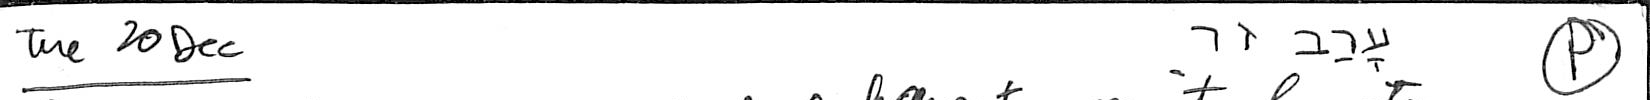

In [15]:
z = np.reshape(z, (100, width)).astype('uint8')
Image.fromarray(z)

In [16]:
print(z.shape)
z = np.delete(z, np.s_[200::], 1)
print(z.shape)

(100, 1650)
(100, 200)


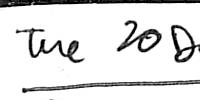

In [17]:
Image.fromarray(z)

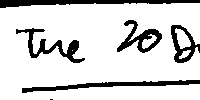

In [18]:
cutoff = 200
a = z.flatten()
a[a < cutoff] = 0
a[a >= cutoff] = 255

a = np.reshape(a, (100, 200)).astype('uint8')
Image.fromarray(a)

In [19]:
a = np.array(data)

In [20]:
a.shape

(4207500, 3)